# heat_flux.ipynb

Author: Robert M. Frost

University of Oklahoma

Created 01 August 2023

Purpose: Plot surface heat flux for simulations for manuscript

In [26]:
import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator

In [27]:
# plotting setup
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')
rc('figure',facecolor='white')
cmap = seaborn.color_palette("Spectral", as_cmap=True)
cmap2 = seaborn.color_palette("cubehelix_r", as_cmap=True)

In [33]:
time = np.arange(0,136,1)
flux = np.empty(136)
for i in range(0,81):
    flux[i] = 0.05
for i in range(81,105):
    flux[i] = 0.30
for i in range(105,136):
    flux[i] = 0.05

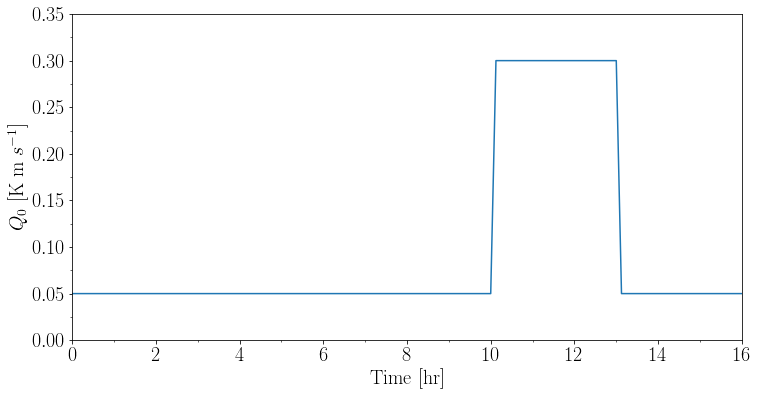

In [38]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(time/8, flux)

ax.set_ylim(0,0.35)
ax.set_ylabel("$Q_0$ [K m $s^{-1}$]")
ax.yaxis.set_minor_locator(MultipleLocator(0.025))

ax.set_xlim(0,16)
ax.set_xlabel("Time [hr]")
ax.xaxis.set_minor_locator(MultipleLocator(1))